In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
#读取数据集
data1 = pd.read_csv("C:/Users/Administrator/动手学/data/winemag-data-130k-v2.csv")
data2 = pd.read_csv("C:/Users/Administrator/动手学/data/winemag-data_first150k.csv")

In [10]:
#标称属性
nominal1 = data1[['country','province','points','price','variety','taster_name']]
nominal2 = data2[['country','province','points','price','variety']]

#数值属性
num1 = data1[['points','price']]
num2 = data2[['points','price']]

In [14]:
#五数概括及缺省值数量
print(num1.describe())
print(num1.isnull().sum())
print('\n')
print(num2.describe())
print(num2.isnull().sum())

              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000
points       0
price     8996
dtype: int64


              points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000
points        0
price     13695
dtype: int64


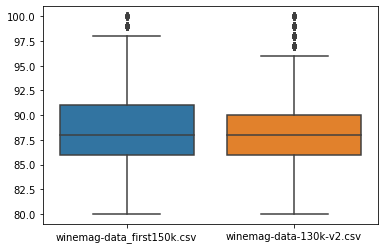

In [27]:
#points盒图
sns.boxplot(data=pd.DataFrame({"winemag-data_first150k.csv":num1[["points"][0]],
                     "winemag-data-130k-v2.csv":num2[["points"][0]]}))

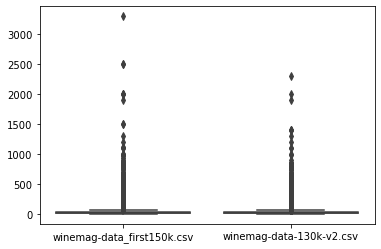

In [28]:
#price盒图
sns.boxplot(data=pd.DataFrame({"winemag-data_first150k.csv":num1[["price"][0]],
                     "winemag-data-130k-v2.csv":num2[["price"][0]]}))

In [29]:
#离群点函数
def outpoint(data,point3,point1):
    out=[]
    for i in range(len(data)):
        if (data[i]>(point3+1.5*(point3-point1))or\
           data[i]<(point1-1.5*(point3-point1))):
               out.append(data[i])
    return out

In [34]:
#度数直方图函数
def counts_of_num(i,data):
    subdata = data[data[i].isin(data[i].value_counts().index)]
    sns.countplot(x=i,data=subdata)

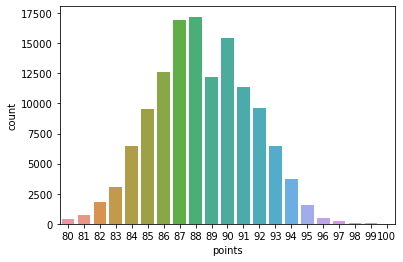

In [35]:
#points度数直方图
counts_of_num('points',num1)

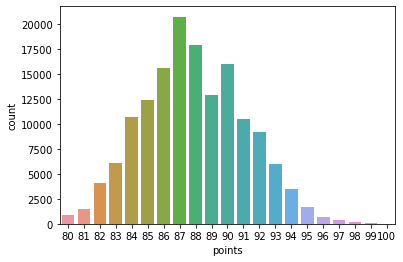

In [36]:
counts_of_num('points',num2)

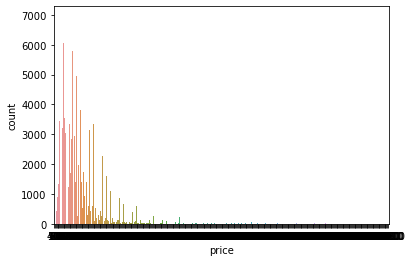

In [37]:
#price度数直方图
counts_of_num('price',num1)

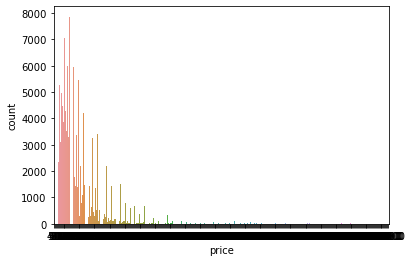

In [38]:
counts_of_num('price',num2)

In [42]:
#缺失值个数
print(nominal1.isnull().sum(),'\n')
print(nominal2.isnull().sum(),'\n')

country           63
province          63
points             0
price           8996
variety            1
taster_name    26244
dtype: int64 

country         5
province        5
points          0
price       13695
variety         0
dtype: int64 



In [44]:
#剔除缺失值
num1_drop = num1.dropna()
num2_drop = num2.dropna()

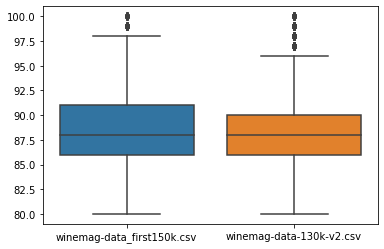

In [50]:
sns.boxplot(data=pd.DataFrame({"winemag-data_first150k.csv":num1_drop[["points"][0]],
                     "winemag-data-130k-v2.csv":num2_drop[["points"][0]]}))

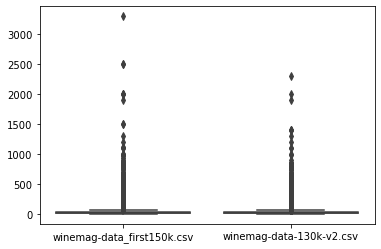

In [51]:
sns.boxplot(data=pd.DataFrame({"winemag-data_first150k.csv":num1_drop[["price"][0]],
                     "winemag-data-130k-v2.csv":num2_drop[["price"][0]]}))

In [59]:
#利用最高频率的值填充缺失值
frequency1=data1[["price"][0]].mode()
frequency2=data2[["price"][0]].mode()
data2_1=data1[["price"][0]].fillna(frequency1[0])
data2_2=data2[["price"][0]].fillna(frequency2[0])

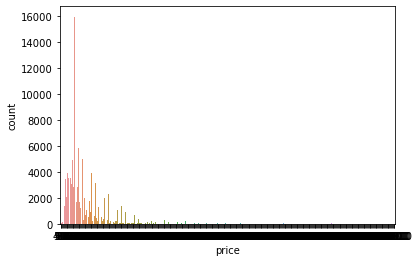

In [63]:
counts_of_num('price',num1)

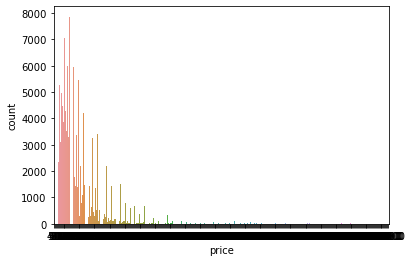

In [64]:
counts_of_num('price',num2)

In [66]:
#对象之间相似性填充
#对象之间的相似性填充
data3_1=data1
data3_2=data2
data3_3=data3_1[data3_1["country"]=="France"]
data3_4=data3_1[data3_1["country"]=="Italy"]
data3_3=data3_3.dropna(axis=0, how='any')
data3_4=data3_4.dropna(axis=0, how='any')

data3_5=data3_2[data3_2["country"]=="France"]
data3_6=data3_2[data3_2["country"]=="Italy"]
data3_5=data3_5.dropna(axis=0, how='any')
data3_6=data3_6.dropna(axis=0, how='any')
#print(data3_3)
frequency_France1=data3_3["price"].mode()
frequency_Italy1=data3_4["price"].mode()

frequency_France2=data3_5["price"].mode()
frequency_Italy2=data3_6["price"].mode()

In [68]:
#属性之间相关性填充
data4_1=data1
data4_2=data2
data4_1=data4_1.dropna(axis=0, how='any')
data4_2=data4_2.dropna(axis=0, how='any')
points1=data4_1["points"]
price1=data4_1["price"]
points2=data4_2["points"]
price2=data4_2["price"]
